In [2]:
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets

pynbody : Verbose mode is on


In [3]:
sim = simulation.Simulation('/media/michele/My Book/Michele/MySimulations/MovingBox/beta/mb.71002/p300_a800_r600/out')
# sim = simulation.Simulation('/home/michele/sim/MySimulations/mb.beta/beta_model.1/out')

Found trace file


From hyplot: `hyplot/src/

formula: [A/B] = log10(A/B)-log10(A_sol/B_sol)

$[Mg/Fe]$

 * log10(M_mgsol/M_fesol) = -0.261299, source: Grevesse et al. 2007 en 2010
 * [Mg/Fe] = log10(M_Mg/M_Fe)-log10(M_Mg_sol/M_Fe_sol)
    
$[Fe/H]$

 * [Fe/H]_sol = - 2.756433 (see Valcke masters thesis)
 * log10(Fe_mass / particleMass) + 2.756433 (see Valcke masters thesis).


In [6]:
MgFe_sol = -0.261299
FeH_sol = -2.756433

In [7]:
# snap.s['mgfe'] = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
# snap.s['mgfe'][np.logical_or(snap.s['mgst'] == 0.0, snap.s['fest'] == 0.0)] = 0.471782

In [8]:
def mgfe(snap):
    arr = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
    arr[np.logical_or(snap.s['mgst'] == 0.0, snap.s['fest'] == 0.0)] = 0.471782
    return arr #np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol

def feh(snap):
    arr = np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol
    arr[np.logical_or(snap.s['fest'] == 0.0, snap.s['mass'] == 0.0)] = -98.0
    return arr

In [9]:
from pynbody import filt
popIII_filt = filt.BandPass('feh', -5, 100)

# Taking just the star particles.

In [10]:
snap_slider = ipywidgets.IntSlider(min=0,max=len(sim)-1,step=1,value=0, continuous_update=False, description='Snap:')
def k(i):
    snap = sim[i].s
    snap.s['mgfe'] = mgfe(snap)
    snap.s['feh'] = feh(snap)

    subsnap = snap[popIII_filt]

#     snap.s['mgfe'] = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
#     snap.s['feh'] = np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol

    fig, ax = plt.subplots(1, figsize=(6,4))
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[Mg/Fe]')
    scatter = ax.scatter(subsnap.s['feh'], subsnap.s['mgfe'], alpha = 0.3, s=10, c=subsnap.s['age'])
    fig.colorbar(scatter)
    ax.set_title('time: {:.2f}'.format(sim[i].header.time))
    return fig

w = ipywidgets.interactive(k, i=snap_slider)
#                         velocity_proj=_proj,
#                         sfh=_sfh,
#                         cog=_traj,
#                         vrange=_vminmax,
#                         width=_width_slider,
#                         resolution=_res_slider)
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=446), Output()), _d…

In [11]:
snap = sim[260]
pynbody.analysis.halo.center(snap.s)
snap.s['mgfe'] = mgfe(snap)
snap.s['feh'] = feh(snap)
subsnap = snap.s[popIII_filt]

pynbody.analysis._com : Initial rough COM=[ 25.5151496   24.59397055  30.69943685]
pynbody.analysis.halo : Final SSC=[ 25.02395368  24.50182725  30.51171534]
pynbody.analysis.halo : Finding halo velocity center...
pynbody.analysis.halo : vcen=[-9.15856075  6.32031012 -0.15002386]
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody-0.45-py3.6-linux-x86_64.egg/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


In [12]:
snap.s['smooth'], snap.s['rho']

pynbody.snapshot : Deriving array smooth
pynbody.sph : Building tree with leafsize=16
pynbody.sph : Tree build done in 0.0019 s
pynbody.sph : Smoothing with 50 nearest neighbours
pynbody.sph : Smoothing done in 0.00905s
pynbody.snapshot : Deriving array rho
pynbody.sph : Calculating SPH density
pynbody.sph : Density calculation done in 0.00637 s


(SimArray([ 11.13713741,   8.47716427,   8.0493536 , ...,   8.76276207,
            18.22064972,   8.44440937], dtype=float32, 'kpc'),
 SimArray([  6.63961830e-10,   1.29627031e-09,   1.30417144e-09, ...,
             9.92094629e-10,   9.48268339e-11,   6.61199484e-10], dtype=float32, '1.00e+10 Msol kpc**-3'))

In [13]:
snap.s['mgfe_sph'] = snap.s.kdtree.sph_mean(snap.s['mgfe'])
snap.s['feh_sph']  = snap.s.kdtree.sph_mean(snap.s['feh'])

pynbody.sph.kdtree : Smoothing array with 64 nearest neighbours
pynbody.sph.kdtree : SPH smooth done in 0.0102 s
pynbody.sph.kdtree : Smoothing array with 64 nearest neighbours
pynbody.sph.kdtree : SPH smooth done in 0.00571 s


In [14]:
# df = pd.DataFrame({k: subsnap.s[k] for k in ['mgfe', 'feh', 'age', 'massform']})
df = pd.DataFrame({k: subsnap.s[k] for k in ['mgfe_sph', 'feh_sph', 'age', 'massform']})
df.head()

pynbody.snapshot : Deriving array age


,age,feh_sph,massform,mgfe_sph
0,2.153999,-1.511880,0.000001,-0.176215
1,6.804740,-6.072363,0.000001,0.088383
2,4.272181,-5.710474,0.000001,0.156220
3,5.560349,-12.735028,0.000001,0.212726
4,5.345648,-11.089416,0.000001,0.161986


In [15]:
df.describe()

,age,feh_sph,massform,mgfe_sph
count,5870.000000,5870.000000,5.870000e+03,5870.000000
mean,3.642003,-5.494823,1.070124e-06,0.190906
std,2.049632,6.109871,1.790889e-08,0.109585
min,0.000113,-83.590935,1.057502e-06,-0.228845
25%,1.905592,-6.886965,1.058194e-06,0.123337
50%,3.342609,-2.874289,1.063014e-06,0.201118
75%,5.349336,-1.885113,1.074801e-06,0.269467
max,10.924187,-0.768592,1.219853e-06,0.594641


In [16]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5870 entries, 0 to 5869
Data columns (total 4 columns):
age         5870 non-null float32
feh_sph     5870 non-null float32
massform    5870 non-null float32
mgfe_sph    5870 non-null float32
dtypes: float32(4)
memory usage: 137.6 KB


In [17]:
df_clean.head()

,age,feh_sph,massform,mgfe_sph
0,2.153999,-1.511880,0.000001,-0.176215
1,6.804740,-6.072363,0.000001,0.088383
2,4.272181,-5.710474,0.000001,0.156220
3,5.560349,-12.735028,0.000001,0.212726
4,5.345648,-11.089416,0.000001,0.161986


In [18]:
df_clean.describe()

,age,feh_sph,massform,mgfe_sph
count,5870.000000,5870.000000,5.870000e+03,5870.000000
mean,3.642003,-5.494823,1.070124e-06,0.190906
std,2.049632,6.109871,1.790889e-08,0.109585
min,0.000113,-83.590935,1.057502e-06,-0.228845
25%,1.905592,-6.886965,1.058194e-06,0.123337
50%,3.342609,-2.874289,1.063014e-06,0.201118
75%,5.349336,-1.885113,1.074801e-06,0.269467
max,10.924187,-0.768592,1.219853e-06,0.594641


In [22]:
df_clean.head()

,age,feh_sph,massform,mgfe_sph
0,2.153999,-1.511880,0.000001,-0.176215
1,6.804740,-6.072363,0.000001,0.088383
2,4.272181,-5.710474,0.000001,0.156220
3,5.560349,-12.735028,0.000001,0.212726
4,5.345648,-11.089416,0.000001,0.161986


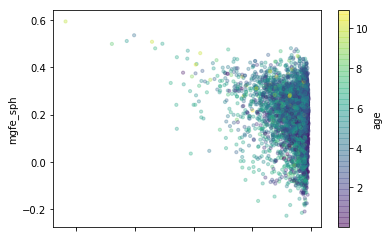

In [20]:
# plt.scatter(df_clean.feh, df_clean.mgfe, alpha = 0.2)
df_clean.plot.scatter('feh_sph', 'mgfe_sph', alpha=0.3, s=10, c='age', colormap='viridis');

/home/michele/Software/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'xlabel', 'ylabel'
  s)


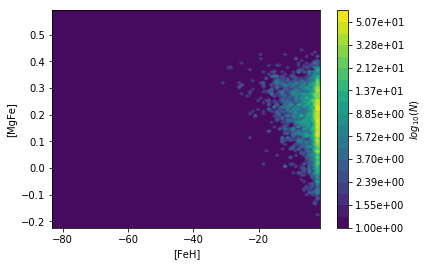

In [21]:
# pynbody.plot.generic.hist2d(snap.s['feh'], snap.s['mgfe'])
pynbody.plot.generic.hist2d(df_clean.feh_sph, df_clean.mgfe_sph, xlabel='[FeH]', ylabel='[MgFe]', colorbar=True);

In [31]:
snap.kdtree

AttributeError: 'GadgetSnap' object has no attribute 'kdtree'

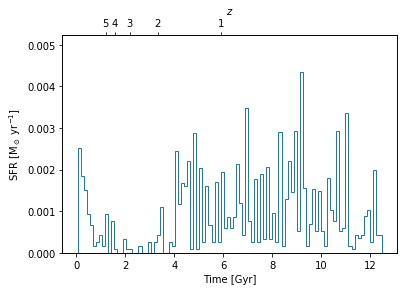

In [73]:
fig2, ax_sfh = plt.subplots(1)
sim.plot_sfh(ax_sfh);

pynbody.sph : Rendering image on 8 threads...


SimArray([[ 0.35540229,  0.35314283,  0.35088336, ...,  0.11188523,
            0.11225799,  0.11263074],
          [ 0.35259256,  0.35039839,  0.34820426, ...,  0.11542562,
            0.11579233,  0.11615905],
          [ 0.34978282,  0.34765396,  0.34552512, ...,  0.118966  ,
            0.11932667,  0.11968735],
          ..., 
          [ 0.42266271,  0.42107049,  0.41947833, ...,  0.20418736,
            0.20851794,  0.21284851],
          [ 0.42067257,  0.41906726,  0.41746205, ...,  0.20164052,
            0.20597512,  0.21030971],
          [ 0.41868237,  0.41706407,  0.41544574, ...,  0.19909367,
            0.20343231,  0.20777091]], dtype=float32)

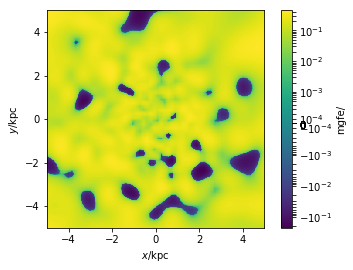

In [75]:
pynbody.plot.image(snap.s, qty='mgfe')

pynbody.sph : Rendering image on 8 threads...


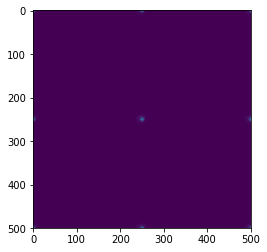

In [76]:
im = pynbody.sph.render_image(snap.s)
plt.imshow(im)

In [87]:
import pynbody.plot as pp

In [ ]:
snap

pynbody.plot.stars : Selecting disk stars
pynbody.plot.stars : Creating profile
pynbody.plot.stars : Plotting


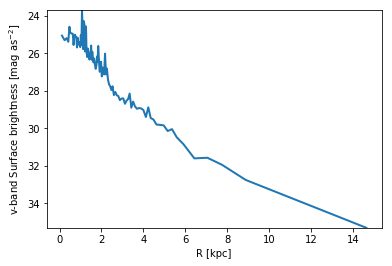

In [88]:
pp.sbprofile(snap,center=False)

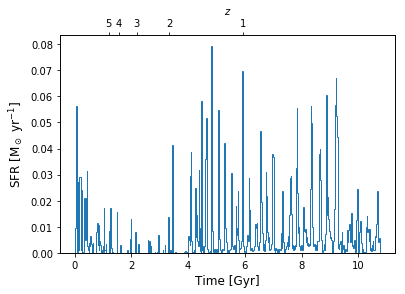

In [90]:
pp.sfh(snap,nbins=500);

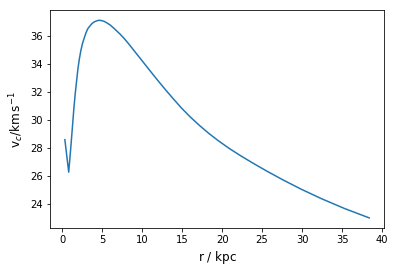

In [92]:
pp.rotation_curve(snap,quick=True, max='40 kpc',center=False);

In [111]:
# snap.properties['eps'] = '0.3 kpc'  # needed for quick=False

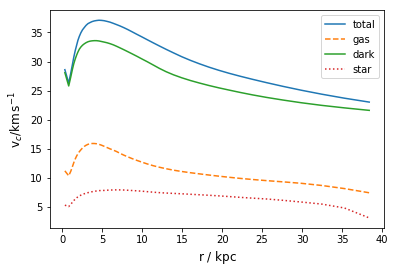

In [101]:
pp.rotation_curve(snap,quick=True, parts=True, legend=True, max='40 kpc',center=False);

/home/michele/Software/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'xlabel', 'ylabel'
  s)


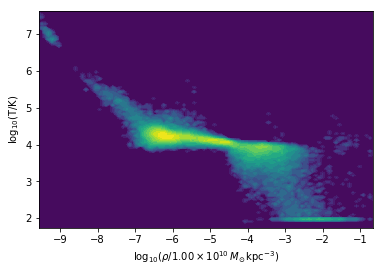

In [103]:
pp.rho_T(snap);

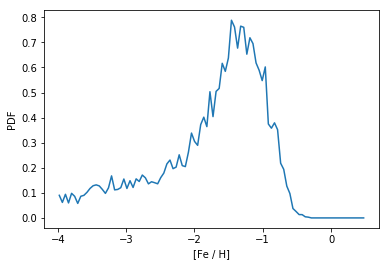

In [104]:
pp.mdf(snap.stars, range=[-4,0.5])

pynbody.plot.profile : Centering...
pynbody.analysis._com : Initial rough COM=[ 12.27832006   0.23609703  -4.53999001]
pynbody.analysis.halo : Final SSC=[-0.07003345 -0.00465663  0.09561283]
pynbody.analysis.halo : Finding halo velocity center...
pynbody.analysis.halo : vcen=[-2.65556812 -2.35640788  1.11301661]
pynbody.plot.profile : Creating profile...


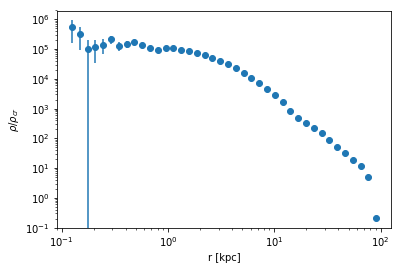

In [105]:
pp.density_profile(snap.dark, center=True)

In [107]:
# pp.guo(snap,baryfrac=True)

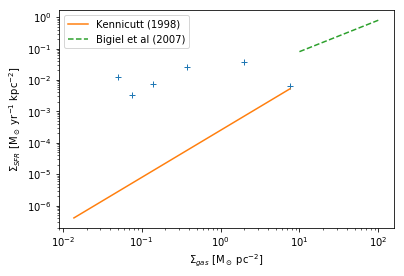

In [108]:
pp.schmidtlaw(snap, center=False)

In [110]:
# pp.satlf(snap)